# The Keto Diet Project: Final Report

By: Daniella Bojado

## Goal:
- Can we predict if a food is "Keto Friendly" based solely on it's macro percentages from a nutritional facts database?
- Use a clustering model to answer the question above and find out if certain groupings exist in the data already.

## What is Keto?
- A Ketogenic Diet primarily consists of high-fats, moderate-proteins, and very-low-carbohydrates.     


- Ketosis is a metabolic state characterized by elevated levels of ketone bodies in the blood or urine.     


- Being in ketosis can help you burn fat, feel less hungry, and allow you to keep muscle.       


- For healthy people who don't have diabetes and aren't pregnant, ketosis usually kicks in after 3 or 4 days of eating fewer than 50 grams of carbohydrates per day. However, you typically have to have under 25 grams of carbs a day to in considered in a true state of ketosis.           
 

- Ketosis is also tricky because not consuming enough fat or consuming too much protein will prevent you from getting into ketosis. 

### Known Keto-Friendly Foods/Drinks: 
        Fat/Protein/Carbs  
- Meat (1 serving of top sirloin steak)  
        13/22/0
- Fish and seafood (6 ounces of baked halibut)  
        7.6/38/0
- Eggs (2 large eggs) 
        8/12/0
- Natural fat/high-fat sauces (2 tablespoons for basil pesto sauce)   
        12.6/1.8/2.5
- Vegetables that grow above ground (1 cup cauliflower)
        4.3/2.3/5.2
- High-fat dairy (1 cup of whole milk)
        7.9/7.7/11.7
- Nuts (1 ounce mixed)
        15/6/6
- Berries (1 cup of blackberries)
        1/2/20

### Foods to Avoid on Keto:
        Fat/Protein/Carbs 
- Fruit (1 banana)
        0.4/1.3/27
- Potatoes (1 baked potato)
        0.3/3.6/36.5
- Pasta (1 cup)
        1.3/8.1/43.2
- Rice (1 cup)
        0.4/4.4/53.2
- Beer (12 ounces)
        0/1.6/12.6	
- Bread (2 slices)
        2/4/28	
- Sodas (1 can of Coke)
        0/0/65	
- Candy (M&M’s 10 pieces)
        1.5/0.3/5.1 
        
        
                                *** Info taken from "Lose It!" app ***

### According to https://www.nateliason.com/blog/easy-keto, the typical macro ratio for keto looks like the following (specifically for a 2,000 kcal per day diet): 

- <b>Fat:</b> 70% of total calories (156 g per day)
- <b>Protein:</b> 25% of total calories (125 g per day)
- <b>Carbs:</b> 5% of total calories (25 g per day) 

### Assuming you eat 3 meals a day, you should be consuming the following macros per meal:
- <b>Fat:</b> 52 g per meal
- <b>Protein:</b> 41.7 g per meal
- <b>Carbs:</b> 8.3 g per meal

## Imports

In [1]:
# General Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

# Train Validate Test
from sklearn.model_selection import train_test_split

# Modeling Imports
from sklearn.cluster import KMeans

# Acquire and Prepare Files
import acquire 
import prepare

# Warnings 
import warnings
warnings.filterwarnings("ignore")

## Acquire

- Acquire data

In [2]:
# Acquired data
df = pd.read_csv("nutrition.csv")
df.head()

,number,food_item,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100 g,381,0.1,NaN,0,9.00 mg,0.4 mg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,1,"Nuts, pecans",100 g,691,72.0,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,2,"Eggplant, raw",100 g,25,0.2,NaN,0,2.00 mg,6.9 mg,22.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,3,"Teff, uncooked",100 g,367,2.4,0.4g,0,12.00 mg,13.1 mg,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,4,"Sherbet, orange",100 g,144,2.0,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [3]:
# Total dataframe shape (8.7k different food items)
df.shape

(8789, 77)

In [4]:
# Nutrition data info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 77 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number                       8789 non-null   int64  
 1   food_item                    8789 non-null   object 
 2   serving_size                 8789 non-null   object 
 3   calories                     8789 non-null   int64  
 4   total_fat                    8789 non-null   float64
 5   saturated_fat                7199 non-null   object 
 6   cholesterol                  8789 non-null   object 
 7   sodium                       8789 non-null   object 
 8   choline                      8789 non-null   object 
 9   folate                       8789 non-null   object 
 10  folic_acid                   8789 non-null   object 
 11  niacin                       8789 non-null   object 
 12  pantothenic_acid             8789 non-null   object 
 13  riboflavin        

In [5]:
# Write a function to add to acquire.py file

## Prepare

- Prepare and clean data

In [6]:
# Check for missing/null values 
print(df.isnull().sum())

number          0
food_item       0
serving_size    0
calories        0
total_fat       0
               ..
alcohol         0
ash             0
caffeine        0
theobromine     0
water           0
Length: 77, dtype: int64


In [7]:
# Dropping columns 

In [8]:
df = df.drop(['number', 'saturated_fat','cholesterol','sodium','choline','folate','folic_acid','niacin','pantothenic_acid',
         'riboflavin','thiamin','vitamin_a','vitamin_a_rae','carotene_alpha','carotene_beta','cryptoxanthin_beta',
         'lutein_zeaxanthin','lucopene','vitamin_b12','vitamin_b6','vitamin_c','vitamin_d','vitamin_e','tocopherol_alpha',
        'vitamin_k','calcium','copper', 'iron','magnesium','manganese','phosphorous','potassium','selenium','zinc',
        'alanine','arginine','aspartic_acid','cystine','glutamic_acid','glycine','histidine','hydroxyproline','isoleucine',
        'leucine','lysine','methionine','phenylalanine','proline','serine','threonine','tryptophan','tyrosine','valine',
        'fiber', 'sugars','fructose','galactose','glucose','lactose','maltose','sucrose','fat','saturated_fatty_acids',
        'monounsaturated_fatty_acids','polyunsaturated_fatty_acids','fatty_acids_total_trans','alcohol','ash','caffeine',
        'theobromine','water'], axis = 1)
df.head()

,food_item,serving_size,calories,total_fat,protein,carbohydrate
0,Cornstarch,100 g,381,0.1,0.26,91.27
1,"Nuts, pecans",100 g,691,72.0,9.17,13.86
2,"Eggplant, raw",100 g,25,0.2,0.98,5.88
3,"Teff, uncooked",100 g,367,2.4,13.30,73.13
4,"Sherbet, orange",100 g,144,2.0,1.10,30.40


In [9]:
# Want to note here that total_fat, protein, and carbohydrates are all in grams

In [10]:
# Entire database has the serving size as 100g to provide a comparison with one less variable. 
# Will drop this column for now. 
df = df.drop(['serving_size'], axis = 1)
df.head()

,food_item,calories,total_fat,protein,carbohydrate
0,Cornstarch,381,0.1,0.26,91.27
1,"Nuts, pecans",691,72.0,9.17,13.86
2,"Eggplant, raw",25,0.2,0.98,5.88
3,"Teff, uncooked",367,2.4,13.30,73.13
4,"Sherbet, orange",144,2.0,1.10,30.40


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
calories,8789.0,226.283878,169.862001,0.0,91.00,191.00,337.00,902.00
total_fat,8789.0,10.556855,15.818247,0.0,1.00,5.10,14.00,100.00
protein,8789.0,11.345616,10.530602,0.0,2.38,8.02,19.88,88.32
carbohydrate,8789.0,22.121915,27.266261,0.0,0.05,9.34,34.91,100.00


<b>Takeaways:</b>
- No missing values
- Carbohydrates have highest mean, std, and 50% and 75% numbers compared to other macros
- That's why keto is so difficult because carbs are everywhere
- Average calories for this food list is 226

### Visualize

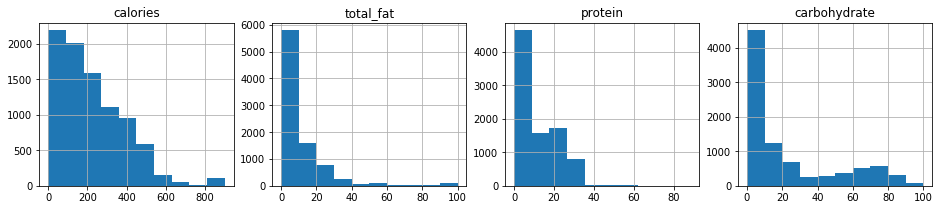

In [12]:
# Plot data to identify outliers and distributions
plt.figure(figsize=(16, 3))
for i, col in enumerate(['calories', 'total_fat', 'protein', 'carbohydrate']):  
    plot_number = i + 1
    series = df[col]  
    plt.subplot(1,4, plot_number)
    plt.title(col)
    series.hist()

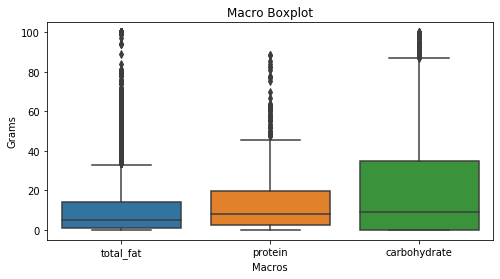

In [13]:
# Dropped calories because we're only interested in macros
plt.figure(figsize=(8,4))
sns.boxplot(data=df.drop(columns=['food_item', 'calories']))
plt.title('Macro Boxplot')
plt.xlabel('Macros') 
plt.ylabel('Grams')
plt.show() 

In [14]:
# Drop outliers


<b>Takeaways:</b>
- All three macros have about the same or very similar average
- Total fat has the most outliers ((~35)-100)
- All three have a good number of outliers all on the high end
- Carbs have a higher spread

In [15]:
# Write a function to add to prepare.py file

def wrangle_nutrition():
    df = pd.read_csv("nutrition.csv")
    df.drop(columns='student_id', inplace=True)
    df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
    df = grades.dropna().astype('int')
    return df

### Train, Validate, Test

In [16]:
# Train, Validate, Test
train_and_validate, test = train_test_split(df, random_state=123)
train, validate = train_test_split(train_and_validate, random_state=123)

## Explore 

### Macro Comparisons

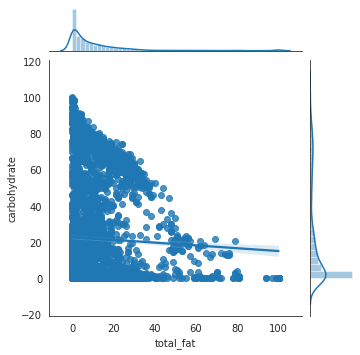

In [17]:
# Looking for foods that have high fat and low carbs
with sns.axes_style('white'):
    j = sns.jointplot("total_fat", "carbohydrate", data=train, kind='reg', height=5);
plt.show() 

(0, 4)

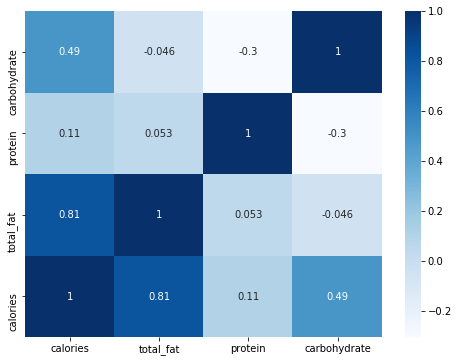

In [18]:
# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(train.corr(), cmap='Blues', annot=True)
plt.ylim(0, 4)

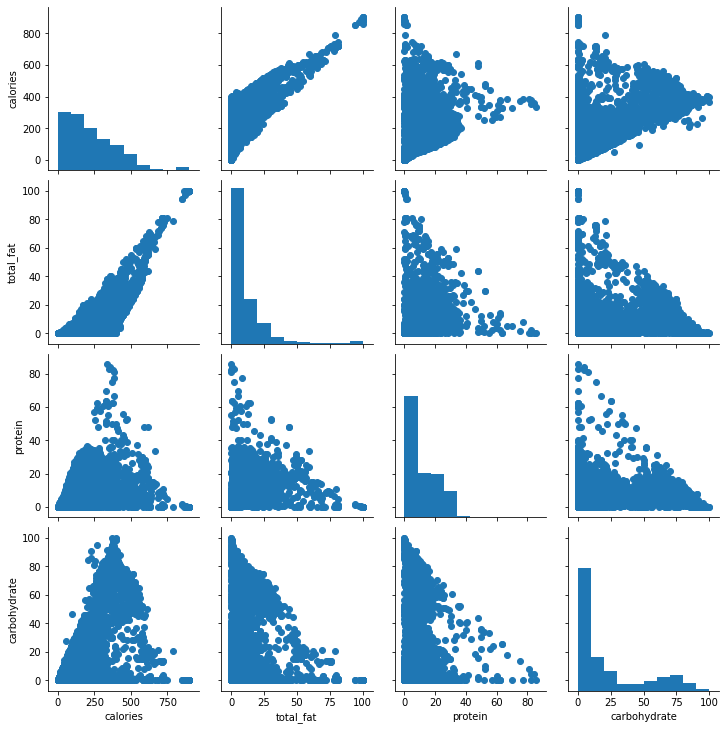

In [19]:
# Compare all with pairgrid
g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

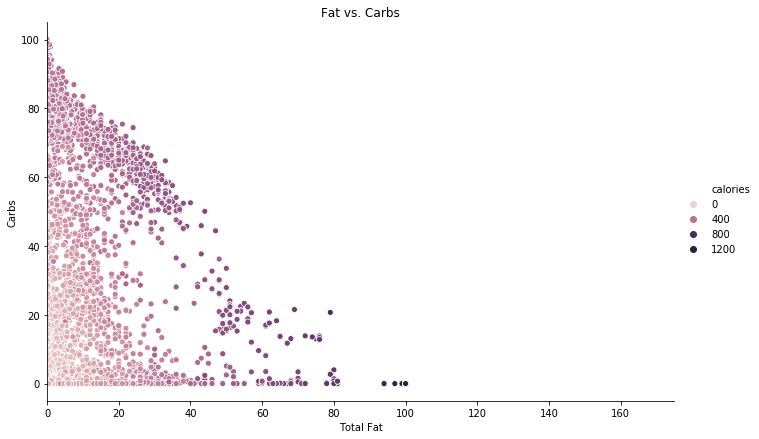

In [20]:
# Comparing total fat vs. carbs 
sns.relplot(x="total_fat", y="carbohydrate", hue="calories", data=train, height=6, aspect=1.6)
plt.xlim(0, 175) 
plt.title('Fat vs. Carbs')
plt.xlabel('Total Fat')
plt.ylabel('Carbs')
plt.show() 

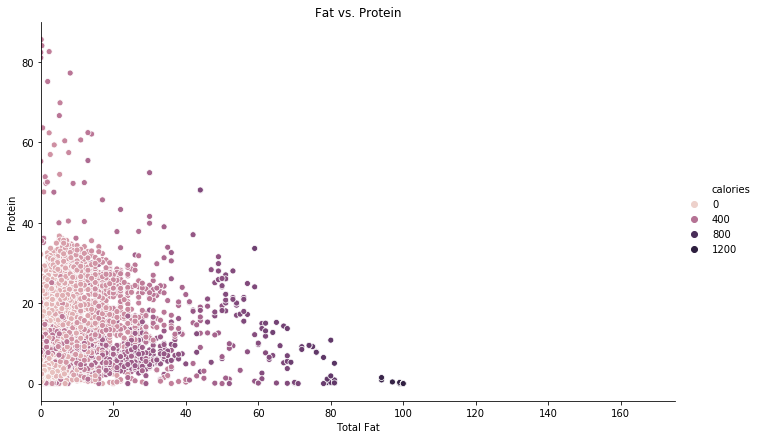

In [21]:
# Comparing total fat vs. protein
sns.relplot(x="total_fat", y="protein", hue="calories", data=train, height=6, aspect=1.6)
plt.xlim(0, 175)
plt.title('Fat vs. Protein')
plt.xlabel('Total Fat')
plt.ylabel('Protein')
plt.show() 

### What are the macro percentages for a food to be considered "keto friendly"?
- <b>Fat:</b> 52 g per meal
- <b>Protein:</b> 41.7 g per meal
- <b>Carbs:</b> 8.3 g per meal

#### After consulting with a nutritionist this is what I found to be considered "keto friendly":
- Must be under 25g of carbs a day to be consider true ketosis.   


- Not consuming enough fat or consuming too much protein will prevent you from getting into ketosis.     


- Ketosis usually kicks in after 3 or 4 days of eating fewer than 50 grams, therefore being strict is crucial.          

In [22]:
# Low Carb Foods
low_carb = df[(df.carbohydrate < 8.3)] 
low_carb.head()

,food_item,calories,total_fat,protein,carbohydrate
2,"Eggplant, raw",25,0.2,0.98,5.88
5,"Cauliflower, raw",25,0.3,1.92,4.97
6,"Taro leaves, raw",42,0.7,4.98,6.70
7,"Lamb, raw, ground",282,23.0,16.56,0.00
8,"Cheese, camembert",300,24.0,19.80,0.46


In [23]:
# High Fat Foods
# Greater that 14g because of the 75% of foods with high fat are over that number
high_fat = df[(df.total_fat > 14)&(df.total_fat < 52)] 
high_fat.head()

,food_item,calories,total_fat,protein,carbohydrate
7,"Lamb, raw, ground",282,23.0,16.56,0.00
8,"Cheese, camembert",300,24.0,19.80,0.46
9,Vegetarian fillets,290,18.0,23.00,9.00
14,"Chicken, boiled, feet",215,15.0,19.40,0.20
16,"Pie, lemon, fried pies",316,16.0,3.00,42.60


In [24]:
# High Protein Foods
# Greater that 19.99g because of the 75% of foods with high protein are over that number
high_protein = df[(df.protein > 19.88)&(df.protein < 41.7)]
high_protein.head() 

,food_item,calories,total_fat,protein,carbohydrate
9,Vegetarian fillets,290,18.0,23.00,9.0
15,"Quail, raw, meat only",134,4.5,21.76,0.0
27,"Ostrich, raw, top loin",119,3.0,21.67,0.0
36,"Emu, raw, outside drum",103,0.5,23.08,0.0
44,"Fish, raw, sheepshead",108,2.4,20.21,0.0


In [25]:
# High Fat, Low Carb Foods
hf_lc = df[(df.total_fat > 4)&(df.carbohydrate < 20)]
hf_lc.head()  

,food_item,calories,total_fat,protein,carbohydrate
1,"Nuts, pecans",691,72.0,9.17,13.86
7,"Lamb, raw, ground",282,23.0,16.56,0.00
8,"Cheese, camembert",300,24.0,19.80,0.46
9,Vegetarian fillets,290,18.0,23.00,9.00
14,"Chicken, boiled, feet",215,15.0,19.40,0.20


In [26]:
# High Fat, Zero Carb Foods
# This ends up including a lot of oils, we're looking for more substantial foods
zero_carbs = df[(df.total_fat > 15)&(df.carbohydrate == 0)]
zero_carbs.head() 

,food_item,calories,total_fat,protein,carbohydrate
7,"Lamb, raw, ground",282,23.0,16.56,0.0
48,"Butter oil, anhydrous",876,99.0,0.28,0.0
67,"Oil, soybean lecithin",763,100.0,0.00,0.0
192,"Oil, corn and canola",884,100.0,0.00,0.0
212,"Oil, ucuhuba butter",884,100.0,0.00,0.0


In [27]:
zero_carbs.describe().T

,count,mean,std,min,25%,50%,75%,max
calories,548.0,438.965328,248.949494,158.0,267.000,304.50,594.5000,902.0
total_fat,548.0,41.388686,32.463345,16.0,19.000,23.00,62.2500,100.0
protein,548.0,16.490949,10.590480,0.0,7.025,18.72,24.6075,61.3
carbohydrate,548.0,0.000000,0.000000,0.0,0.000,0.00,0.0000,0.0


In [28]:
# So it looks like food items with > 66 are mostly oils and butters
zero_carbs = df[(df.total_fat > 66)&(df.carbohydrate == 0)]
zero_carbs.head()  

,food_item,calories,total_fat,protein,carbohydrate
48,"Butter oil, anhydrous",876,99.0,0.28,0.0
67,"Oil, soybean lecithin",763,100.0,0.00,0.0
192,"Oil, corn and canola",884,100.0,0.00,0.0
212,"Oil, ucuhuba butter",884,100.0,0.00,0.0
223,"Oil, apricot kernel",884,100.0,0.00,0.0


In [29]:
# High Fat, Zero Carb Foods
#Looks like this might just be meats only
zero_carbs_high_fat = df[(df.total_fat > 15)&(df.total_fat <50)&(df.carbohydrate == 0)]
zero_carbs_high_fat.head() 

,food_item,calories,total_fat,protein,carbohydrate
7,"Lamb, raw, ground",282,23.0,16.56,0.0
694,"Smelt, dried (Alaska Native)",386,18.0,56.19,0.0
695,"Lamb, broiled, cooked, ground",283,20.0,24.75,0.0
809,"USDA Commodity, canned, beef",246,18.0,20.52,0.0
950,"Pork, cooked, ground, fresh",297,21.0,25.69,0.0


### The "Ideal"

In [30]:
# High Fat, Low Carb, Moderate Protein Foods 
# The "ideal" macros for a Keto Diet for a 2,000 kcal per day diet
# You can see these are mostly meats, cheeses, and eggs. Therefore, classic Keto
hf_lc_mp = df[(df.total_fat > 14)&(df.total_fat < 52)&(df.carbohydrate < 8.3)&(df.protein > 8.02)&(df.protein < 41.7)]
hf_lc_mp.head(10) 

,food_item,calories,total_fat,protein,carbohydrate
7,"Lamb, raw, ground",282,23.0,16.56,0.00
8,"Cheese, camembert",300,24.0,19.80,0.46
14,"Chicken, boiled, feet",215,15.0,19.40,0.20
68,"Egg, fresh, raw, yolk",322,27.0,15.86,3.59
84,"Cheese, port de salut",352,28.0,23.78,0.57
89,Bacon and beef sticks,517,44.0,29.10,0.80
90,"Salami, pork, Italian",425,37.0,21.70,1.20
99,Ham and cheese spread,245,19.0,16.18,2.28
124,"Cheese, Mexican blend",358,29.0,23.54,1.75
140,"Frankfurter, chicken",223,16.0,15.51,2.74


In [31]:
# Out of a nutritional database with a total of 8789 food items, 745 items are "Keto Friendly"
hf_lc_mp.shape

(745, 5)

### Feature Engineering

In [32]:
# Working on it 

### Hypothesis Testing

In [33]:
# Working on it 

## Modeling

### Clustering Model: K-Means 

In [34]:
X = df[['carbohydrate', 'total_fat']]

In [35]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([1, 2, 0, ..., 0, 0, 0], dtype=int32)

In [36]:
df['cluster'] = kmeans.predict(X)

In [37]:
kmeans.cluster_centers_

array([[ 7.78257564,  6.82274692],
       [65.96031322, 11.08590511],
       [ 7.04021563, 70.33692722]])

In [38]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,carbohydrate,total_fat
0,7.782576,6.822747
1,65.960313,11.085905
2,7.040216,70.336927


In [39]:
df.groupby('cluster')['carbohydrate', 'total_fat'].mean()

,carbohydrate,total_fat
cluster,,
0,7.782576,6.822747
1,65.960313,11.085905
2,7.040216,70.336927


Text(0.5, 1.0, 'Visualizing Cluster Centers')

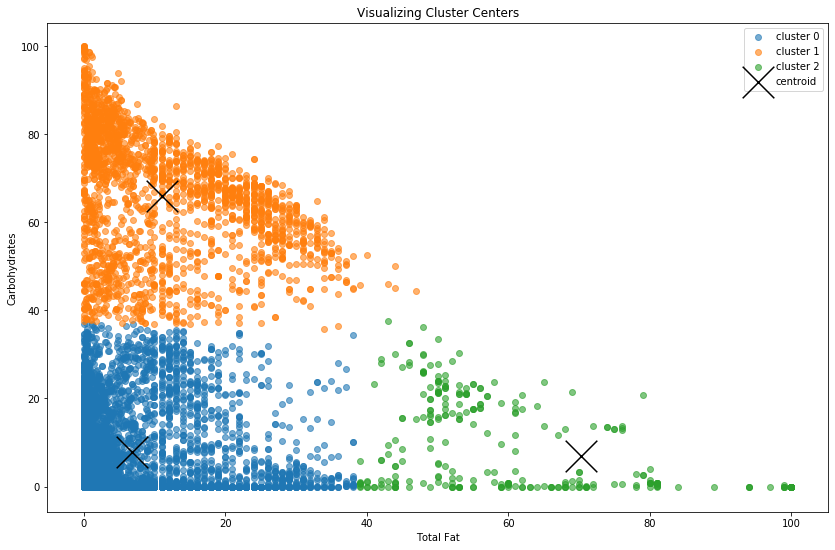

In [40]:
plt.figure(figsize=(14, 9))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.total_fat, subset.carbohydrate, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='carbohydrate', x='total_fat', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('Total Fat')
plt.ylabel('Carbohydrates')
plt.title('Visualizing Cluster Centers')

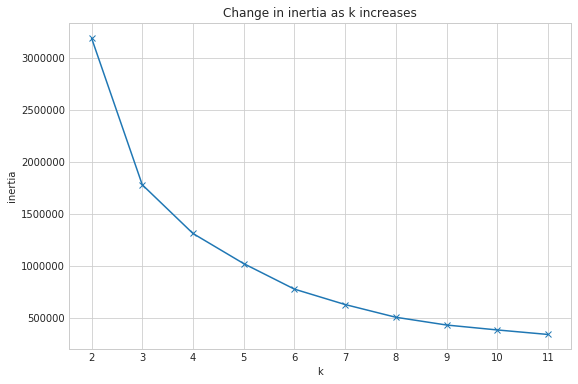

In [41]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

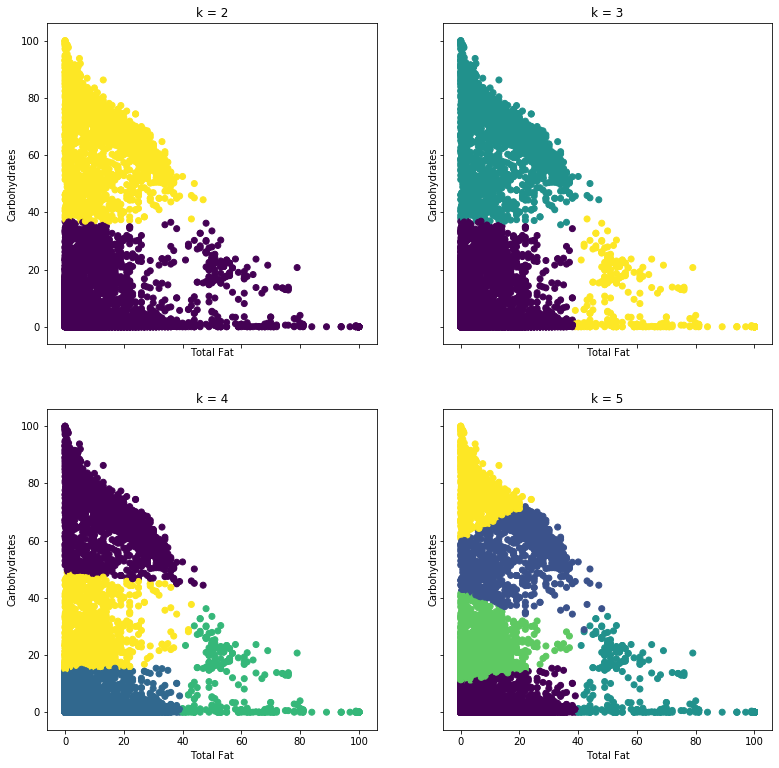

In [42]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.total_fat, X.carbohydrate, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='Total Fat', ylabel='Carbohydrates')

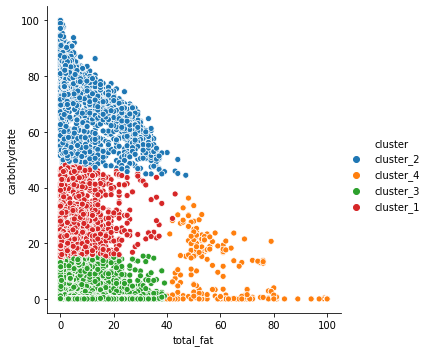

In [43]:
kmeans = KMeans(n_clusters=4).fit(X)
df['cluster'] = kmeans.predict(X)
df.cluster = 'cluster_' + (df.cluster + 1).astype('str')
sns.relplot(data=df, x='total_fat', y='carbohydrate', hue='cluster')

- We can conclude that based on the visualizations above that the optimal number of clusters is 4.

In [44]:
# Foods from Model 4, which would be moderate carbs and high fat. These are mostly oils and butters. 
# You can see that these foods are labelled "cluster_3", orange
clustered_foods_2 = df[(df.total_fat > 40)&(df.carbohydrate < 40)]
clustered_foods_2.head() 

,food_item,calories,total_fat,protein,carbohydrate,cluster
1,"Nuts, pecans",691,72.0,9.17,13.86,cluster_4
29,"Nuts, dried, pine nuts",673,68.0,13.69,13.08,cluster_4
37,"Nuts, dried, beechnuts",576,50.0,6.20,33.50,cluster_4
48,"Butter oil, anhydrous",876,99.0,0.28,0.00,cluster_4
67,"Oil, soybean lecithin",763,100.0,0.00,0.00,cluster_4


In [45]:
# Foods from Model 4, which would be low carb and moderate fat
# You can see that these foods are labelled "cluster_4", green
clustered_foods = df[(df.total_fat < 40)&(df.carbohydrate < 15)]
clustered_foods.head(50) 

,food_item,calories,total_fat,protein,carbohydrate,cluster
2,"Eggplant, raw",25,0.2,0.98,5.88,cluster_3
5,"Cauliflower, raw",25,0.3,1.92,4.97,cluster_3
6,"Taro leaves, raw",42,0.7,4.98,6.70,cluster_3
7,"Lamb, raw, ground",282,23.0,16.56,0.00,cluster_3
8,"Cheese, camembert",300,24.0,19.80,0.46,cluster_3
9,Vegetarian fillets,290,18.0,23.00,9.00,cluster_3
10,"PACE, Picante Sauce",25,0.0,0.00,6.25,cluster_3
12,"Mango nectar, canned",51,0.1,0.11,13.12,cluster_3
14,"Chicken, boiled, feet",215,15.0,19.40,0.20,cluster_3
15,"Quail, raw, meat only",134,4.5,21.76,0.00,cluster_3


#### When you compare this list to the "ideal keto" above, this list is a bit more rounded/balanced. Of course it includes "classic keto" foods like meats, cheeses, and eggs. However it also included some vegatables and fruits that if eatten in controlled portions can be included to have a more balanced diet but still stay under the daily macros of:

- Fat: 70% of total calories (156 g per day)
- Protein: 25% of total calories (125 g per day)
- Carbs: 5% of total calories (25 g per day)

## Conclusions/Takeaways

#### What was best model?
- The K-means, k=4 model provided the best clustering.
    
#### How did the findings compare with what is known?
- Cluster 3 matched up very closely to a ketogenic diet that could be more balanced and substantial in the long-term. This information might be great for someone who needs help making food choices that are not all just meat, cheese, and eggs. 

## Future Investigations

- Can other food items be classified under certain diets (vegan, vegetarian, low-carb, etc) using similar methods?  


- Could this system be used on an food tracking app to give users suggestions on what food they should be buying depending on what diet they are on? This could take out a lot of the guessing and research that comes with being on a diet and really simplify things for the user.

## Resources:

- https://www.ncbi.nlm.nih.gov/books/NBK499830/
- https://www.hsph.harvard.edu/nutritionsource/healthy-weight/diet-reviews/ketogenic-diet/
- https://www.dietdoctor.com/low-carb/keto/foods
- https://www.nateliason.com/blog/easy-keto
- The "Lose It!" app